Dataset source : https://ai.baidu.com/broad/download

incase you're wondering what the curl command is doing there...  
Well the reason is simple:  
Instead of using the file upload button to upload the dataset zip file like a lil ass *****,  
I decided to spend hours, learning about how to setup an nginx server on my system locally, and then use microsoft dev tunnel to port forward the server so that I can download it directly into colab using curl...  
Only to encounter an error whils downloading the file, and (ofcourse) spend hours debugging that error. (Turned out dev tunnel only allows a max transfer of 512MB at a go).  
And then spend a coulple more hours trying to forward the server port using ssh, which was a huge mistake (don't ask me why), and then finally finding out about ngrok, which I finally used to forward the localserver port, like a real MAN!!!!!!  
  
ARGHHH!!! I'm so hyped right now!! I could fight a silver back gorilla, I could fight 2 silver back gorillas !! MANNNNNNN!!!!!


##### Load in da data



In [1]:
!curl -O https://5297-102-91-4-195.ngrok-free.app/AMD-Training400.zip --http1.1

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  572M  100  572M    0     0  1184k      0  0:08:15  0:08:15 --:--:-- 1348k


In [2]:
!mkdir ./data

In [3]:
!unzip ./AMD-Training400.zip -d ./data

Archive:  ./AMD-Training400.zip
   creating: ./data/Training400/
   creating: ./data/Training400/AMD/
  inflating: ./data/Training400/AMD/A0001.jpg  
  inflating: ./data/Training400/AMD/A0002.jpg  
  inflating: ./data/Training400/AMD/A0003.jpg  
  inflating: ./data/Training400/AMD/A0004.jpg  
  inflating: ./data/Training400/AMD/A0005.jpg  
  inflating: ./data/Training400/AMD/A0006.jpg  
  inflating: ./data/Training400/AMD/A0007.jpg  
  inflating: ./data/Training400/AMD/A0008.jpg  
  inflating: ./data/Training400/AMD/A0009.jpg  
  inflating: ./data/Training400/AMD/A0010.jpg  
  inflating: ./data/Training400/AMD/A0011.jpg  
  inflating: ./data/Training400/AMD/A0012.jpg  
  inflating: ./data/Training400/AMD/A0013.jpg  
  inflating: ./data/Training400/AMD/A0014.jpg  
  inflating: ./data/Training400/AMD/A0015.jpg  
  inflating: ./data/Training400/AMD/A0016.jpg  
  inflating: ./data/Training400/AMD/A0017.jpg  
  inflating: ./data/Training400/AMD/A0018.jpg  
  inflating: ./data/Training400/AM

In [4]:
!curl -O https://5297-102-91-4-195.ngrok-free.app/DF-Annotation-Training400.zip --http1.1

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  106M  100  106M    0     0  1258k      0  0:01:26  0:01:26 --:--:-- 1314k


In [5]:
!unzip ./DF-Annotation-Training400.zip -d ./data

Archive:  ./DF-Annotation-Training400.zip
warning [./DF-Annotation-Training400.zip]:  46759433 extra bytes at beginning or within zipfile
  (attempting to process anyway)
   creating: ./data/Training400/Disc_Fovea_Illustration/
  inflating: ./data/Training400/Disc_Fovea_Illustration/A0001.jpg  
  inflating: ./data/Training400/Disc_Fovea_Illustration/A0002.jpg  
  inflating: ./data/Training400/Disc_Fovea_Illustration/A0003.jpg  
  inflating: ./data/Training400/Disc_Fovea_Illustration/A0004.jpg  
  inflating: ./data/Training400/Disc_Fovea_Illustration/A0005.jpg  
  inflating: ./data/Training400/Disc_Fovea_Illustration/A0006.jpg  
  inflating: ./data/Training400/Disc_Fovea_Illustration/A0007.jpg  
  inflating: ./data/Training400/Disc_Fovea_Illustration/A0008.jpg  
  inflating: ./data/Training400/Disc_Fovea_Illustration/A0009.jpg  
  inflating: ./data/Training400/Disc_Fovea_Illustration/A0010.jpg  
  inflating: ./data/Training400/Disc_Fovea_Illustration/A0011.jpg  
  inflating: ./data/Trai

##### Small EDA ??

In [6]:
import os
import pandas as pd

path2data = './data/'
path2labels = os.path.join(path2data, 'Training400', 'Fovea_location.xlsx')

labels_df = pd.read_excel(path2labels, index_col = 'ID')
labels_df.head()

imgName      Fovea_X      Fovea_Y
ID                                     
1   A0001.jpg  1182.264278  1022.018842
2   A0002.jpg   967.754046  1016.946655
3   A0003.jpg  1220.206714   989.944033
4   A0004.jpg  1141.140888  1000.594955
5   A0005.jpg  1127.371832  1071.109440

In [7]:
labels_df.tail()

imgName     Fovea_X     Fovea_Y
ID                                    
396  N0307.jpg  823.024991  690.210211
397  N0308.jpg  647.598978  795.653188
398  N0309.jpg  624.571803  755.694880
399  N0310.jpg  687.523044  830.449187
400  N0311.jpg  746.107631  759.623062

<Axes: xlabel='Fovea_X', ylabel='Fovea_Y'>

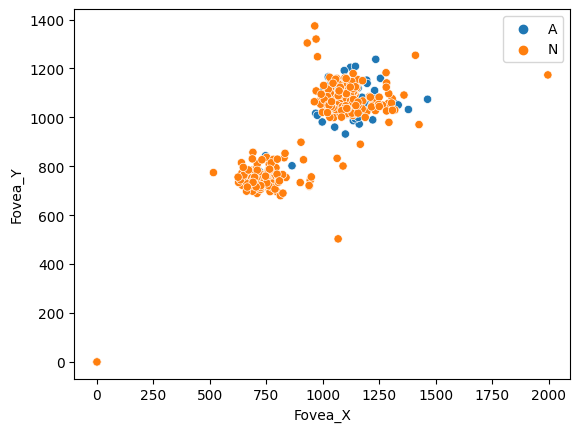

In [8]:
import seaborn as sns
%matplotlib inline

AorN = [imn[0] for imn in labels_df.imgName]
sns.scatterplot(x=labels_df['Fovea_X'], y = labels_df['Fovea_Y'], hue=AorN)

In [9]:
from PIL import Image, ImageDraw
import matplotlib.pylab as plt

def load_img_label(labels_df, id_):
  imgName = labels_df['imgName']
  if imgName[id_][0] == 'A':
    prefix = 'AMD'
  else:
    prefix = 'Non-AMD'

  fullpath2img = os.path.join(path2data, 'Training400', prefix, imgName[id_])
  img = Image.open(fullpath2img)
  x = labels_df['Fovea_X'][id_]
  y = labels_df['Fovea_Y'][id_]
  label = (x, y)
  return img, label

def show_img_label(img, label, w_h=(25, 25), thickness=2):
  w, h = w_h
  cx, cy = label
  draw = ImageDraw.Draw(img)
  draw.rectangle(((cx-w, cy-h), (cx+w, cy+h)), outline='green', width=thickness)
  plt.imshow(np.asarray(img))



[ 73 371 160 294 217 191]
(2124, 2056) (1037.89889229694, 1115.71768088143)
(1444, 1444) (635.148992978281, 744.648850248249)
(1444, 1444) (639.360312038611, 814.762764100936)
(2124, 2056) (1122.08407442503, 1067.58829793991)
(2124, 2056) (1092.93333646222, 1055.15333296773)
(2124, 2056) (1112.50135915347, 1070.7251775623)


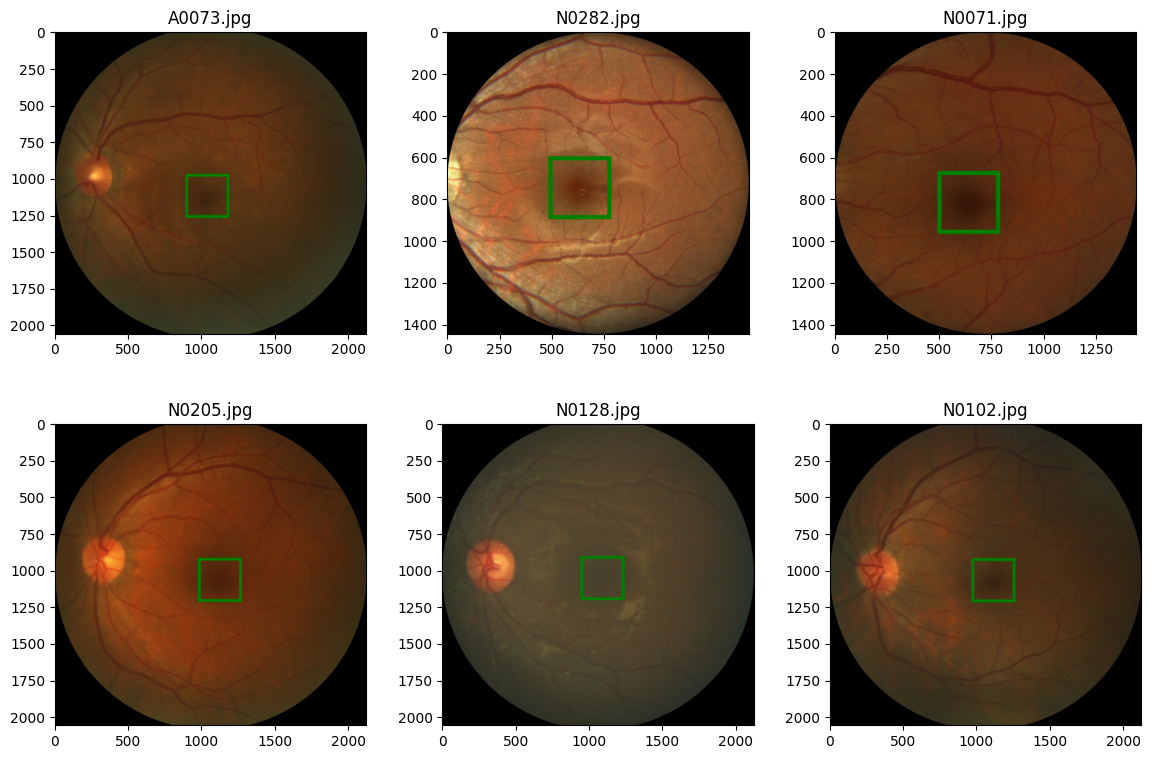

In [10]:
import numpy as np

np.random.seed(2019)

plt.rcParams['figure.figsize'] = (15, 9)
plt.subplots_adjust(wspace=0, hspace=0.3)
nrows, ncols = 2, 3

imgName = labels_df['imgName']
ids = labels_df.index
rndIds = np.random.choice(ids, nrows*ncols)
print(rndIds)

for i, id_ in enumerate(rndIds):
  img, label = load_img_label(labels_df, id_)
  print(img.size, label)
  plt.subplot(nrows, ncols, i+1)
  show_img_label(img, label, w_h=(150, 150), thickness=20)
  plt.title(imgName[id_])

##### Data Transformation ( Pipeline )

(2124, 2056) (1182.26427759023, 1022.01884158854)
(256, 256) (142.4951295024006, 127.25526432230848)


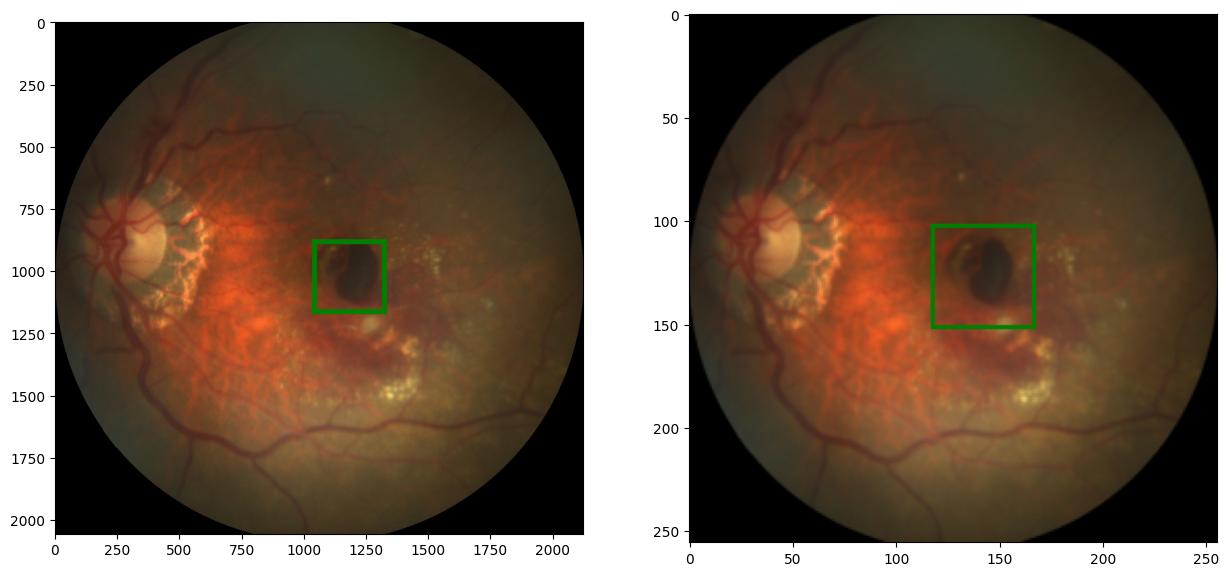

In [11]:
import torchvision.transforms.functional as TF

def resize_img_label(image, label=(0.,0.), target_size=(256, 256)):
  w_original, h_original = image.size
  w_target, h_target = target_size
  cx, cy = label
  image_new = TF.resize(image, target_size)
  label_new = cx/w_original*w_target, cy/h_original*h_target
  return image_new, label_new

#testing
img, label = load_img_label(labels_df, 1)
print(img.size, label)

img_r, label_r = resize_img_label(img, label)
print(img_r.size, label_r)

plt.subplot(1, 2, 1)
show_img_label(img, label, w_h = (150,150), thickness=20)
plt.subplot(1, 2, 2)
show_img_label(img_r, label_r, w_h=(25, 25))

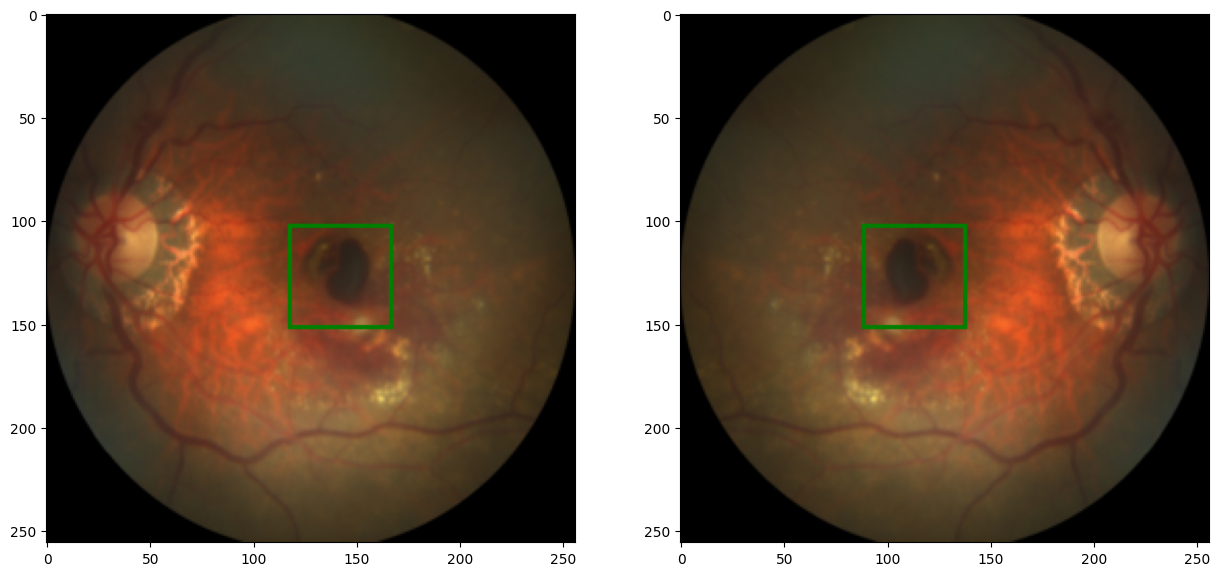

In [12]:
def random_hflip(image, label):
  w, h = image.size
  x, y = label

  image = TF.hflip(image)
  label = w-x, y
  return image, label

#test
img, label = load_img_label(labels_df, 1)
img_r, label_r = resize_img_label(img, label)
img_fh, label_fh = random_hflip(img_r, label_r)

plt.subplot(1, 2, 1)
show_img_label(img_r, label_r)
plt.subplot(1, 2, 2)
show_img_label(img_fh, label_fh)


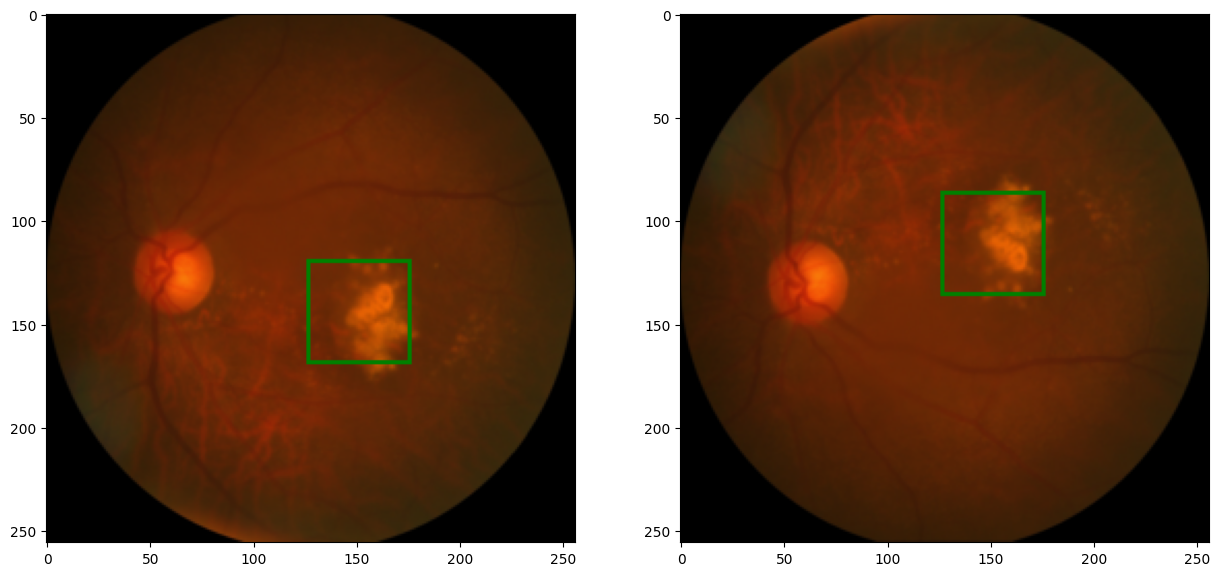

In [13]:
def random_vflip(image, label):
  w, h = image.size
  x, y = label

  image = TF.vflip(image)
  label = x, w-y
  return image, label

#test
img, label = load_img_label(labels_df, 7)
img_r, label_r = resize_img_label(img, label)
img_fv, label_fv = random_vflip(img_r, label_r)

plt.subplot(1, 2, 1)
show_img_label(img_r, label_r)
plt.subplot(1, 2, 2)
show_img_label(img_fv, label_fv)

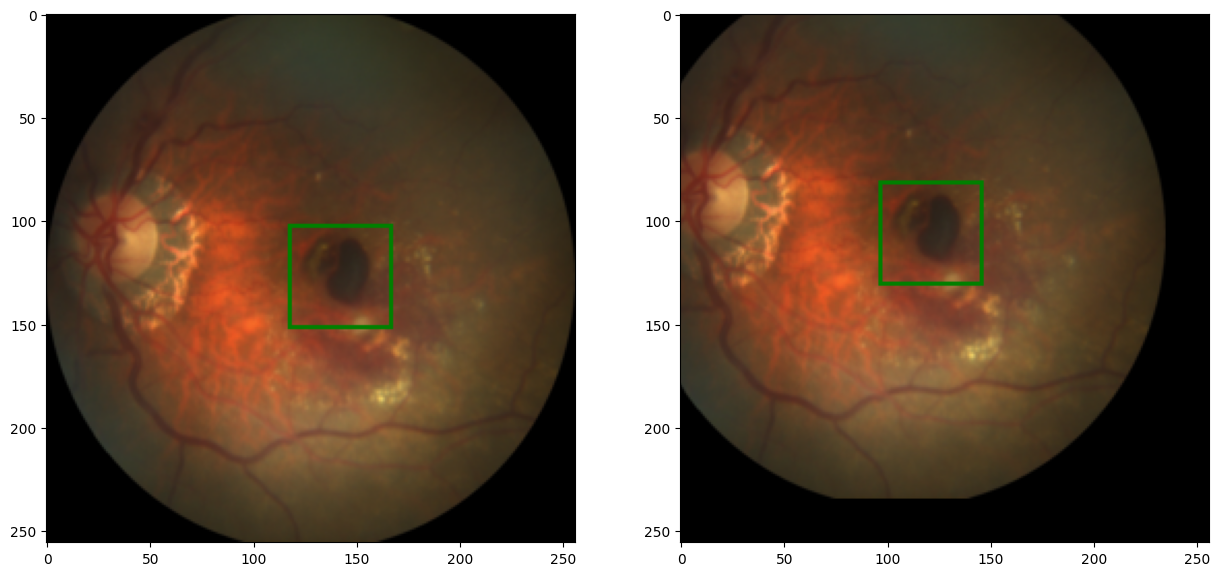

In [14]:
import numpy as np
np.random.seed(1)

def random_shift(image, label, max_translate=(0.2, 0.2)):
  w, h = image.size
  max_t_w, max_t_h = max_translate
  cx, cy = label
  trans_coef = np.random.rand() * 2 - 1
  w_t = int(trans_coef * max_t_w * w)
  h_t = int(trans_coef * max_t_h * h)
  image = TF.affine(image, translate=(w_t, h_t), shear=0, angle=0, scale=1)
  label = cx + w_t, cy + h_t
  return image, label

#test
img, label = load_img_label(labels_df, 1)
img_r, label_r = resize_img_label(img, label)
img_t, label_t = random_shift(img_r, label_r, max_translate=(.5, .5))

plt.subplot(1, 2, 1)
show_img_label(img_r, label_r)
plt.subplot(1, 2, 2)
show_img_label(img_t, label_t)

In [15]:
def scale_label(a,b):
 div = [ai/bi for ai,bi in zip(a,b)]
 return div

def rescale_label(a,b):
 div = [ai*bi for ai,bi in zip(a,b)]
 return div


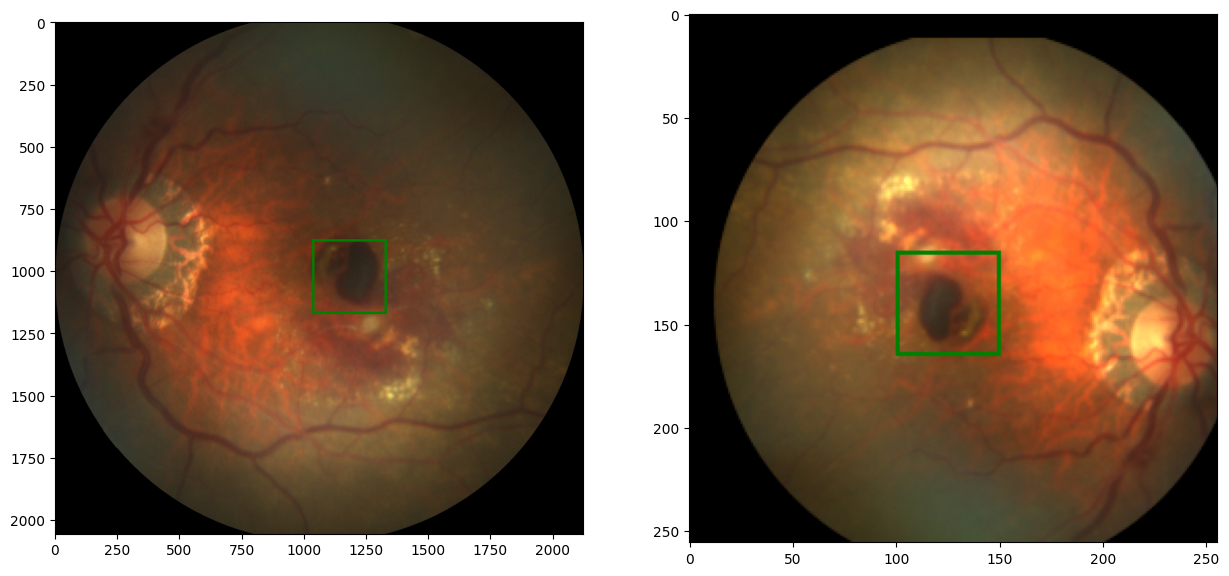

In [16]:
import random

np.random.seed(0)
random.seed(0)

def transformer(image, label, params):
  image, label = resize_img_label(image, label, params['target_size'])
  if random.random() < params['p_hflip']:
    image, label = random_hflip(image, label)
  if random.random() < params['p_vflip']:
    image, label = random_vflip(image, label)
  if random.random() < params['p_shift']:
    image, label = random_shift(image, label, params['max_translate'])
  if random.random() < params['p_brightness']:
    brightness_factor = 1 + (np.random.rand() * 2 - 1) * params['brightness_factor']
    image = TF.adjust_brightness(image, brightness_factor)
  if random.random() < params['p_contrast']:
    contrast_factor = 1 + (np.random.rand() * 2 - 1) * params['contrast_factor']
    image = TF.adjust_contrast(image, contrast_factor)
  if random.random() < params['p_gamma']:
    gamma = 1 + (np.random.rand() * 2 - 1) * params['gamma']
  if params['scale_label']:
    label = scale_label(label, params['target_size'])

  image = TF.to_tensor(image)
  return image, label

#test
img, label = load_img_label(labels_df, 1)

params={
 "target_size" : (256, 256),
 "p_hflip" : 1.0,
 "p_vflip" : 1.0,
 "p_shift" : 1.0,
 "max_translate": (0.5, 0.5),
 "p_brightness": 1.0,
 "brightness_factor": 0.8,
 "p_contrast": 1.0,
 "contrast_factor": 0.8,
 "p_gamma": 1.0,
 "gamma": 0.4,
 "scale_label": False,
}

img_t, label_t = transformer(img, label, params)

plt.subplot(1, 2, 1)
show_img_label(img, label, w_h=(150, 150), thickness=10)
plt.subplot(1, 2, 2)
show_img_label(TF.to_pil_image(img_t),label_t)

##### Dataset

In [17]:
from torch.utils.data import Dataset
from PIL import Image

class AMD_dataset(Dataset):
  def __init__(self, path2data, transform, trans_params):
    path2labels = os.path.join(path2data, 'Training400', 'Fovea_location.xlsx')
    labels_df = pd.read_excel(path2labels, index_col='ID')

    self.labels = labels_df[['Fovea_X', 'Fovea_Y']].values
    self.imgName = labels_df['imgName']
    self.ids = labels_df.index

    self.fullPath2img = [0]*len(self.ids)
    for id_ in self.ids:
      if self.imgName[id_][0] == 'A':
        prefix = 'AMD'
      else:
        prefix = 'Non-AMD'
      self.fullPath2img[id_-1] = os.path.join(path2data, 'Training400', prefix, self.imgName[id_])

    self.transform = transform
    self.trans_params = trans_params

  def __len__(self):
    return len(self.labels)

  def __getitem__(self, idx):
    image = Image.open(self.fullPath2img[idx])
    label = self.labels[idx]
    image, label = self.transform(image, label, self.trans_params)

    return image, label



In [18]:
trans_params_train = {
    'target_size': (256, 256),
    'p_hflip': 0.5,
    'p_vflip': 0.5,
    'p_shift': 0.5,
    'max_translate': (0.2, 0.2),
    'p_brightness': 0.5,
    'brightness_factor': 0.2,
    'p_contrast': 0.5,
    'contrast_factor': 0.2,
    'p_gamma': 0.5,
    'gamma': 0.2,
    'scale_label': True
}

trans_params_val = {
    'target_size': (256, 256),
    'p_hflip': 0.0,
    'p_vflip': 0.0,
    'p_shift': 0.0,
    'max_translate': (0.0, 0.0),
    'p_brightness': 0.0,
    'brightness_factor': 0.0,
    'p_contrast': 0.0,
    'contrast_factor': 0.0,
    'p_gamma': 0.0,
    'gamma': 0.0,
    'scale_label': True
}

In [19]:
from sklearn.model_selection import ShuffleSplit
from torch.utils.data import Subset

amd_ds1 = AMD_dataset(path2data, transformer, trans_params_train)
amd_ds2 = AMD_dataset(path2data, transformer, trans_params_val)

sss = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

indices = range(len(amd_ds1))

for train_index, val_index in sss.split(indices):
  print(len(train_index))
  print('-'*10)
  print(len(val_index))


train_ds = Subset(amd_ds1, train_index)
val_ds = Subset(amd_ds2, val_index)

print(len(train_ds), len(val_ds))


320
----------
80
320 80


In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(0)

def show(img, label=None):
  npimg = img.numpy().transpose((1, 2, 0))
  plt.imshow(npimg)
  if label is not None:
    label = rescale_label(label, img.shape[1:])
    x, y = label
    plt.plot(x, y, 'b+', markersize=20)


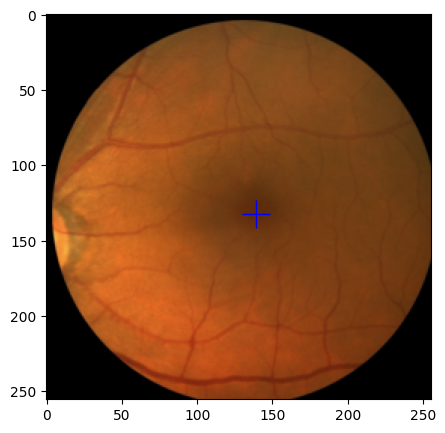

In [21]:

plt.figure(figsize=(5, 5))
for img, label in train_ds:
  show(img, label)
  break

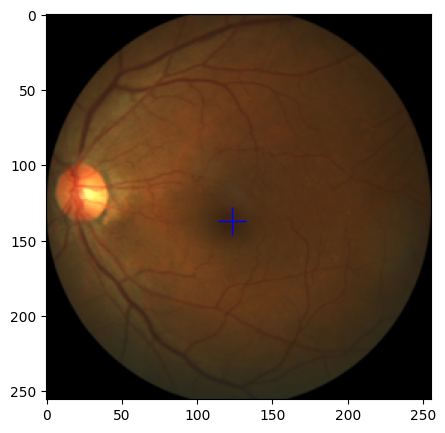

In [22]:
plt.figure(figsize=(5, 5))
for img, label in val_ds:
  show(img, label)
  break

##### DataLoaders

In [23]:
from torch.utils.data import DataLoader

train_dl = DataLoader(train_ds, batch_size=8, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=16, shuffle=False)


In [24]:
for img_b, label_b in train_dl:
  print(img_b.shape, img_b.type)
  print(label_b)
  break

torch.Size([8, 3, 256, 256]) <built-in method type of Tensor object at 0x7db4f273a0c0>
[tensor([0.6728, 0.5278, 0.4779, 0.5037, 0.6933, 0.5131, 0.4818, 0.5169],
       dtype=torch.float64), tensor([0.5979, 0.5398, 0.5221, 0.4609, 0.6326, 0.5074, 0.5071, 0.5203],
       dtype=torch.float64)]


In [25]:
import torch

for img_b, label_b in train_dl:
  print(img_b.shape, img_b.dtype)

  # convert label to tensor & right shape
  label_b = torch.stack(label_b, 1)
  label_b = label_b.type(torch.float32)
  print(label_b.shape, label_b.dtype)
  break

torch.Size([8, 3, 256, 256]) torch.float32
torch.Size([8, 2]) torch.float32


In [26]:
for img_b, label_b in val_dl:
  print(img_b.shape, img_b.dtype)

  # convert label to tensor & right shape
  label_b = torch.stack(label_b, 1)
  label_b = label_b.type(torch.float32)
  print(label_b.shape, label_b.dtype)
  break

torch.Size([16, 3, 256, 256]) torch.float32
torch.Size([16, 2]) torch.float32


##### Model

In [40]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self, params):
    super(Net, self).__init__()

    C_in, H_in, W_in = params['input_shape']
    init_f = params['initial_filters']
    num_outputs = params['num_outputs']

    self.conv1 = nn.Conv2d(C_in, init_f, kernel_size=3, stride=2, padding=1)
    self.conv2 = nn.Conv2d(init_f+C_in, 2*init_f, kernel_size=3, stride=1, padding=1)
    self.conv3 = nn.Conv2d(3*init_f+C_in, 4*init_f, kernel_size=3, padding=1)
    self.conv4 = nn.Conv2d(7*init_f+C_in, 8*init_f, kernel_size=3, padding=1)
    self.conv5 = nn.Conv2d(15*init_f+C_in, 16*init_f, kernel_size=3, padding=1)
    self.fc1 = nn.Linear(16*init_f, num_outputs)

  def forward(self, x):
    identity = F.avg_pool2d(x, 4, 4)
    x = F.relu(self.conv1(x))
    x = F.max_pool2d(x, 2, 2)
    x = torch.cat((x, identity), dim=1)

    identity = F.avg_pool2d(x, 2, 2)
    x = F.relu(self.conv2(x))
    x = F.max_pool2d(x, 2, 2)
    x = torch.cat((x, identity), dim=1)

    identity = F.avg_pool2d(x, 2, 2)
    x = F.relu(self.conv3(x))
    x = F.max_pool2d(x, 2, 2)
    x = torch.cat((x, identity), dim=1)

    identity = F.avg_pool2d(x, 2, 2)
    x = F.relu(self.conv4(x))
    x = F.max_pool2d(x, 2, 2)
    x = torch.cat((x, identity), dim=1)

    x = F.relu(self.conv5(x))
    x = F.adaptive_avg_pool2d(x, 1)
    x = x.reshape(x.size(0), -1)

    x = self.fc1(x)
    return x

In [46]:
params_model = {
    'input_shape': (3, 256, 256),
    'initial_filters': 16,
    'num_outputs': 2,
}

model = Net(params_model)

if torch.cuda.is_available():
  device = torch.device('cuda')
  model = model.to(device)

print(model)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv2): Conv2d(19, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(51, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(115, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(243, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=256, out_features=2, bias=True)
)


##### Loss Funcion, Optimizer, IOU


In [53]:
from torch import optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
import torchvision

loss_func = nn.SmoothL1Loss(reduction='sum')
opt = optim.Adam(model.parameters(), lr=3e-4)

def get_lr(opt):
  for param_group in opt.param_groups:
    return param_group['lr']

lr_scheduler = ReduceLROnPlateau(opt, mode='min', factor=0.5, patience=20, verbose=1)




def cxcy2bbox(cxcy, w=50./256, h=50./256):
  w_tensor = torch.ones(cxcy.shape[0], 1, device=cxcy.device) * w
  h_tensor = torch.ones(cxcy.shape[0], 1, device=cxcy.device) * h

  cx = cxcy[:, 0].unsqueeze(1)
  cy = cxcy[:, 1].unsqueeze(1)

  boxes = torch.cat((cx, cy, w_tensor, h_tensor), -1)  # (cx, cy, w, h)

  return torch.cat((boxes[:, :2] - boxes[:, 2:]/2,     # xmin, ymin
                    boxes[:, :2] + boxes[:, 2:]/2), 1) # xmax, ymax

def metrics_batch(output, target):
  output = cxcy2bbox(output)
  target = cxcy2bbox(target)
  iou = torchvision.ops.box_iou(output, target)
  return torch.diagonal(iou, 0).sum().item()

def loss_batch(loss_func, output, target, opt=None):
  loss = loss_func(output, target)
  with torch.no_grad():
    metric_b = metrics_batch(output, target)
  if opt is not None:
    opt.zero_grad()
    loss.backward()
    opt.step()

  return loss.item(), metric_b


In [58]:
#test boundary box geenrator
torch.manual_seed(0)

cxcy = torch.rand(1, 2)
print('center: ', cxcy*256)

bb = cxcy2bbox(cxcy)
print('bounding box: ', bb*256)

#test metrics_batch
n, c = 8, 2
target = torch.rand(n, c, device=device)
target = cxcy2bbox(target)
print(metrics_batch(target, target))

#test loss batch
for xb, label_b in train_dl:
  label_b = torch.stack(label_b, 1)
  label_b = label_b.type(torch.float32).to(device)

  l, m = loss_batch(loss_func, label_b, label_b)
  print(l, m)
  break

center:  tensor([[127.0417, 196.6648]])
bounding box:  tensor([[102.0417, 171.6648, 152.0417, 221.6648]])
8.0
0.0 8.0


##### Training and Validation


In [50]:
import copy

def loss_epoch(model, loss_func, dataset_dl, opt=None):
  running_loss = 0.0
  running_metric = 0.0
  len_data = len(dataset_dl.dataset)

  for xb, yb in dataset_dl:
    yb = torch.stack(yb, 1)
    yb = yb.type(torch.float32).to(device)
    output = model(xb.to(device))
    loss_b, metric_b = loss_batch(loss_func, output, yb, opt)
    running_loss += loss_b
    if metric_b is not None:
      running_metric += metric_b

  loss = running_loss / float(len_data)
  metric = running_metric / float(len_data)
  return loss, metric

def train_val(model, params):
  num_epochs = params['num_epochs']
  loss_func = params['loss_func']
  opt = params['opt']
  train_dl = params['train_dl']
  val_dl = params['val_dl']
  lr_scheduler = params['lr_scheduler']
  path2weights = params['path2weights']

  loss_history = {
      'train': [],
      'val': []
  }

  metric_history = {
      'train': [],
      'val': []
  }

  best_model_wts = copy.deepcopy(model.state_dict())
  best_loss = float('inf')

  for epoch in range(num_epochs):
    current_lr = get_lr(opt)
    print(f'Epoch {epoch+1}/{num_epochs}, current_lr = {current_lr}')

    model.train()
    train_loss, train_metric = loss_epoch(model, loss_func, train_dl, opt)
    loss_history['train'].append(train_loss)
    metric_history['train'].append(train_metric)

    model.eval()
    with torch.no_grad():
      eval_loss, eval_metric = loss_epoch(model, loss_func, val_dl)
      loss_history['val'].append(eval_loss)
      metric_history['val'].append(eval_metric)

    if eval_loss < best_loss:
      best_loss = eval_loss
      best_model_wts = copy.deepcopy(model.state_dict())
      torch.save(model.state_dict(), path2weights)
      print('Copied best model weights!')

    lr_scheduler.step(eval_loss)
    if current_lr != get_lr(opt):
      print('Loading best model weights!')
      model.load_state_dict(best_model_wts)

    print('train loss: %.6f, accuracy: %.2f'%(train_loss, 100*train_metric))
    print('eval loss: %.6f, accuracy: %.2f'%(eval_loss, 100*eval_metric))

  model.load_state_dict(best_model_wts)
  return model, loss_history, metric_history



In [59]:
path2models= "./models/"
if not os.path.exists(path2models):
 os.mkdir(path2models)

params_train={
 "num_epochs": 100,
 "opt": opt,
 "loss_func": loss_func,
 "train_dl": train_dl,
 "val_dl": val_dl,
 "sanity_check": False,
 "lr_scheduler": lr_scheduler,
 "path2weights": path2models+"weights_smoothl1.pt",
}
model,loss_hist,metric_hist=train_val(model,params_train)

Epoch 1/100, current_lr = 0.0003
Copied best model weights!
train loss: 0.039438, accuracy: 21.17
eval loss: 0.014304, accuracy: 30.19
Epoch 2/100, current_lr = 0.0003
Copied best model weights!
train loss: 0.009998, accuracy: 35.95
eval loss: 0.011606, accuracy: 45.43
Epoch 3/100, current_lr = 0.0003
Copied best model weights!
train loss: 0.011444, accuracy: 32.15
eval loss: 0.011478, accuracy: 33.23
Epoch 4/100, current_lr = 0.0003
train loss: 0.008653, accuracy: 38.87
eval loss: 0.012203, accuracy: 29.84
Epoch 5/100, current_lr = 0.0003
Copied best model weights!
train loss: 0.007330, accuracy: 40.77
eval loss: 0.010170, accuracy: 42.19
Epoch 6/100, current_lr = 0.0003
Copied best model weights!
train loss: 0.005137, accuracy: 48.84
eval loss: 0.009440, accuracy: 57.64
Epoch 7/100, current_lr = 0.0003
train loss: 0.005244, accuracy: 48.88
eval loss: 0.009596, accuracy: 60.98
Epoch 8/100, current_lr = 0.0003
train loss: 0.005112, accuracy: 48.24
eval loss: 0.009577, accuracy: 48.19
E

##### Result Visualization

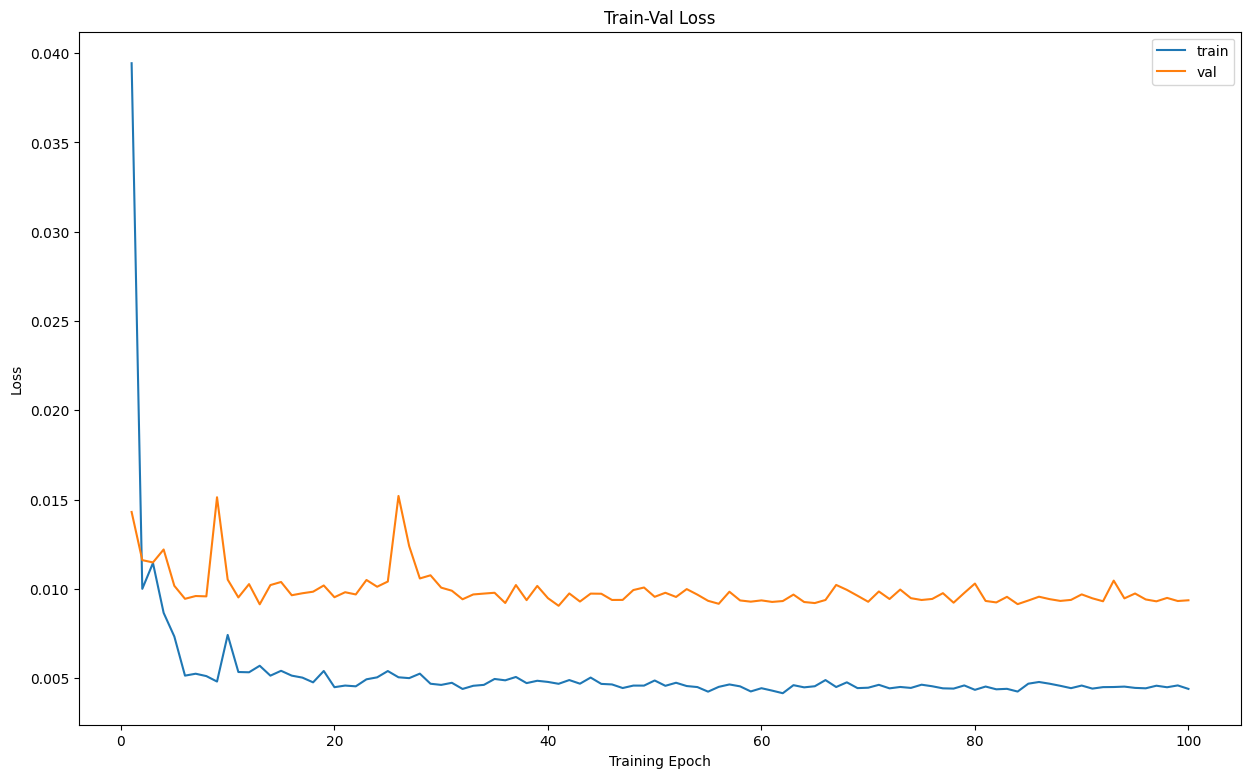

In [60]:
num_epochs = params_train['num_epochs']
plt.title('Train-Val Loss')
plt.plot(range(1, num_epochs+1), loss_hist['train'], label='train')
plt.plot(range(1, num_epochs+1), loss_hist['val'], label='val')
plt.ylabel('Loss')
plt.xlabel('Training Epoch')
plt.legend()
plt.show()

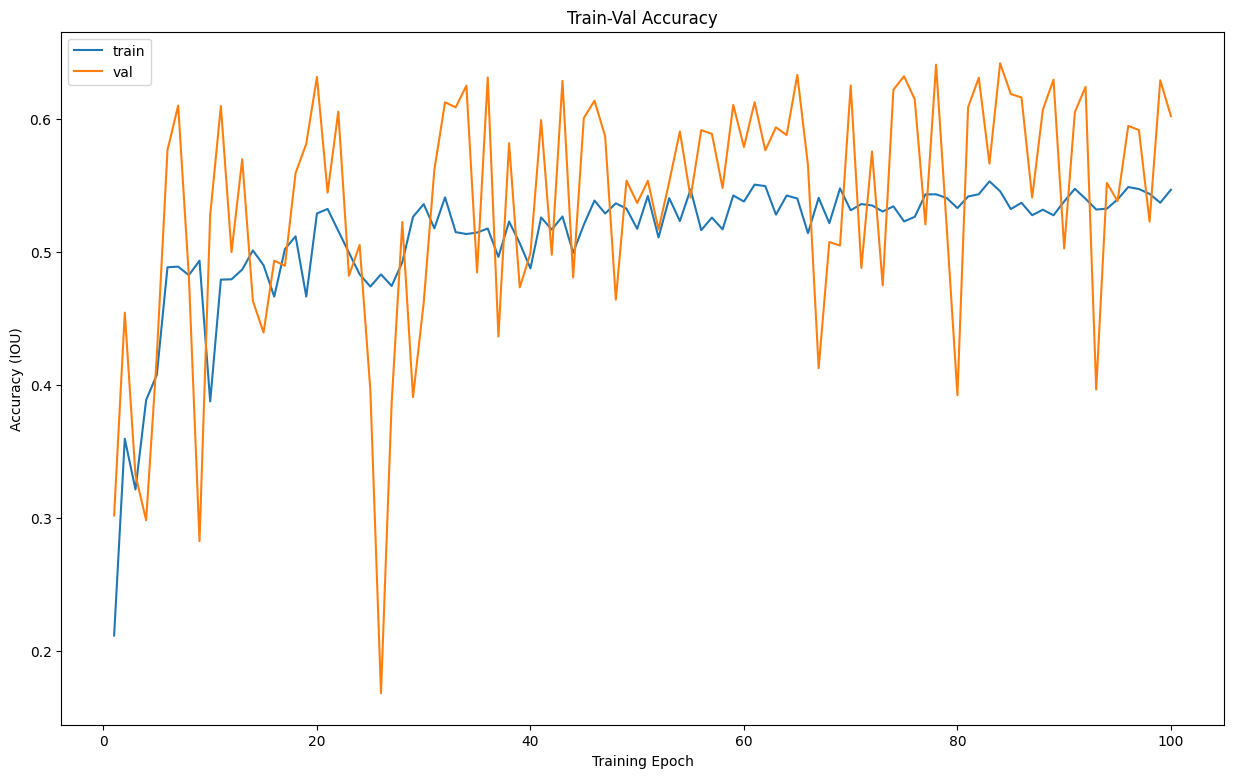

In [61]:
plt.title('Train-Val Accuracy')
plt.plot(range(1, num_epochs+1), metric_hist['train'], label='train')
plt.plot(range(1, num_epochs+1), metric_hist['val'], label='val')
plt.ylabel('Accuracy (IOU)')
plt.xlabel('Training Epoch')
plt.legend()
plt.show()

##### Model Deployment

In [63]:
params_model = {
    'input_shape': (3, 256, 256),
    'initial_filters': 16,
    'num_outputs': 2
}

model = Net(params_model)
model.eval()

if torch.cuda.is_available():
  device = torch.device('cuda')
  model = model.to(device)

path2weights = '/content/models/weights_smoothl1.pt'
model.load_state_dict(torch.load(path2weights))

with torch.no_grad():
  loss, metric = loss_epoch(model, loss_func, val_dl)

print(loss, metric)




0.00904924664646387 0.598911726474762


In [64]:
from PIL import ImageDraw
import numpy as np
import torchvision.transforms.functional as tv_F
import matplotlib.pylab as plt

%matplotlib inline
np.random.seed(0)

def show_tensor_2labels(img, label1, label2, w_h=(25, 25)):
  label1 = rescale_label(label1, img.shape[1:])
  label2 = rescale_label(label2, img.shape[1:])
  img = tv_F.to_pil_image(img)

  w, h = w_h
  cx, cy = label1
  draw = ImageDraw.Draw(img)
  draw.rectangle(((cx-w, cy-h), (cx+w, cy+h)), outline='green', width=2)

  cx, cy, = label2
  draw.rectangle(((cx-w, cy-h), (cx+w, cy+h)), outline='red', width=2)

  plt.imshow(np.asarray(img))


[44 47 64 67 67  9 21 36 70 12]


<ipython-input-65-bb78398e9f55>:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_pred_bb = cxcy2bbox(torch.tensor(label_pred).unsqueeze(0))


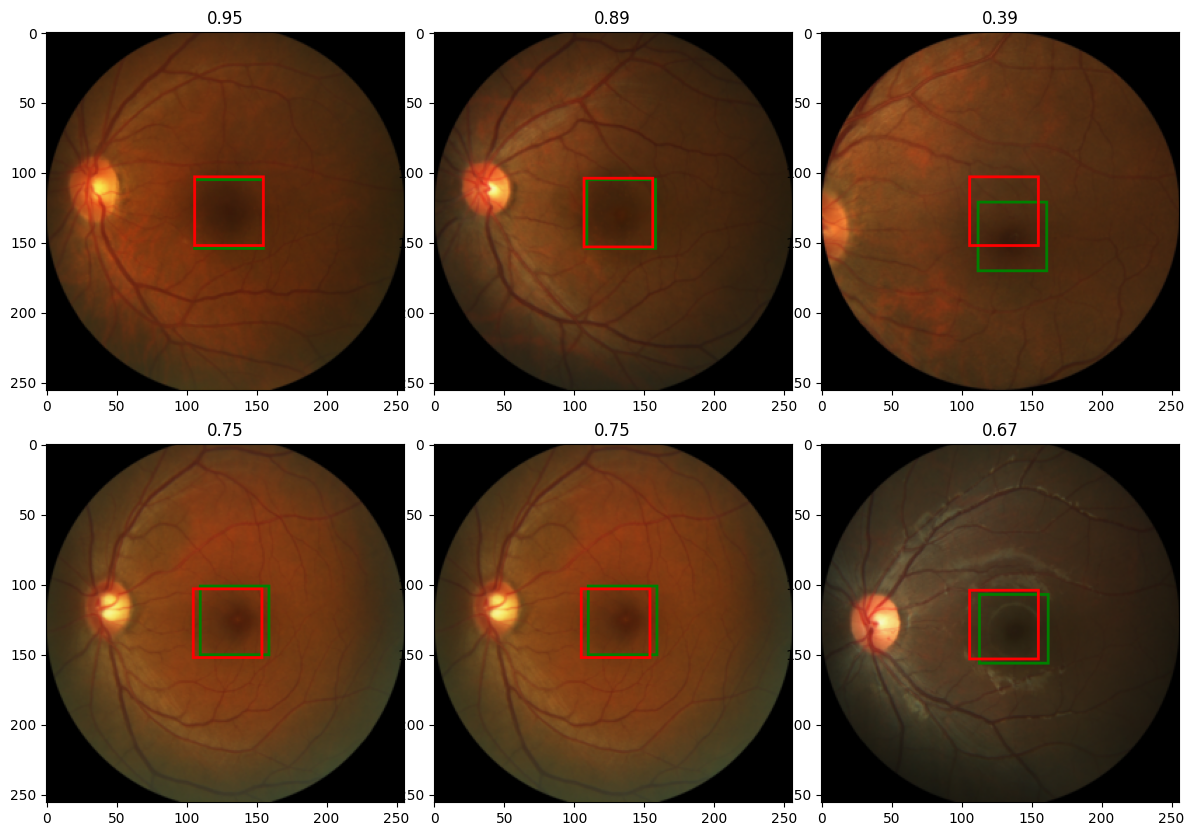

In [65]:
rndInds = np.random.randint(len(val_ds), size=10)
print(rndInds)

plt.rcParams['figure.figsize'] = (15, 10)
plt.subplots_adjust(wspace=0.0, hspace=0.15)

for i, rndi in enumerate(rndInds):
  img, label = val_ds[rndi]
  h, w = img.shape[1:]
  with torch.no_grad():
    label_pred = model(img.unsqueeze(0).to(device))[0].cpu()
  plt.subplot(2, 3, i+1)
  show_tensor_2labels(img, label, label_pred)
  label_bb = cxcy2bbox(torch.tensor(label).unsqueeze(0))
  label_pred_bb = cxcy2bbox(torch.tensor(label_pred).unsqueeze(0))
  iou = torchvision.ops.box_iou(label_bb, label_pred_bb)
  plt.title('%.2f'%iou.item())

  if i > 4:
    break
